# Actividad Clase 1 TSA

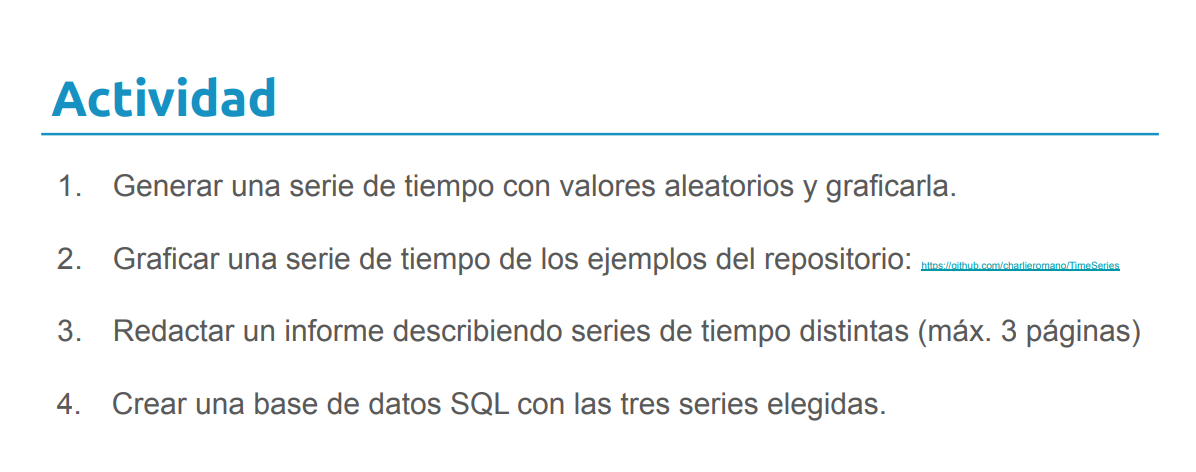

In [1]:
def mean_tsa(tsa, N):
    mean = np.array([])

    for i in range(int(np.floor(len(tsa)/N))):
        mean = np.append(mean, np.sum(tsa[i*N:(i+1)*(N-1)])/ N)
    return mean


def autocorrelacion_k_tsa(tsa, N, k):
    ac = np.array([])
    mean = mean_tsa(tsa, N)
    
    for i in range(int(np.floor(len(tsa)/N))):
        ac = np.append(ac, np.sum((tsa[k:(N-1)]-mean[i])*(tsa[0:(N-1-k)]-mean[i]))/N)
        
    return ac

def autocovarianza_k_tsa(tsa, N, k):
    return autocorrelacion_k_tsa(tsa, N, k)/autocorrelacion_k_tsa(tsa, N, 0)

## 1. Serie de tiempo con valores aleatorios:
#### Distribuciones normales y T-Student

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
mu = 0
sigma = 1
N = 100000
degFreedom = 5
bins = 50

In [4]:
# Random values data series
X = np.random.normal(mu, sigma, N)

Y = np.random.standard_t(degFreedom, N)

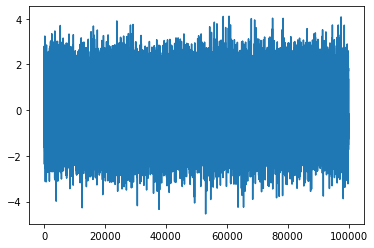

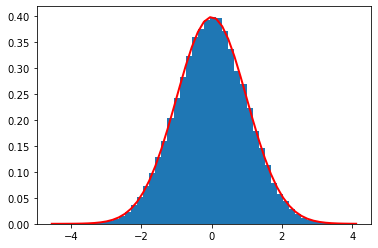

In [5]:
# Plot
plt.plot(X)
plt.show()

count, bins, ignored =plt.hist(X, bins, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color='r')
plt.show()

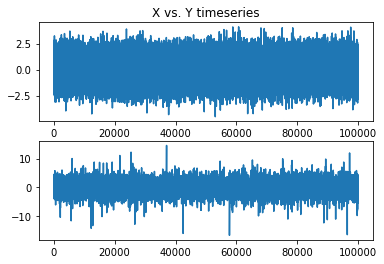

In [6]:
# Data series
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('X vs. Y timeseries')
ax1.plot(X)
ax2.plot(Y)
plt.show()

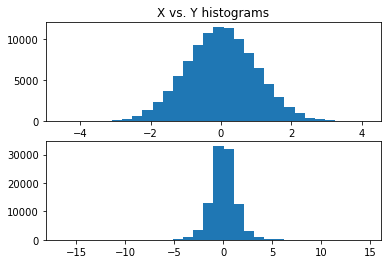

In [7]:
# Histograms
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('X vs. Y histograms')
ax1.hist(X, bins=30)
ax2.hist(Y, bins=30)
plt.show()

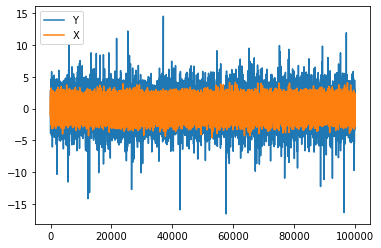

In [8]:
# using Dataframe structure
df=pd.DataFrame({'Y':Y, 'X':X})
df.plot()
plt.show()

In [9]:
## Stats
df.X.describe
df.Y.describe()
dt = pd.DataFrame(df.X.describe())
dt = pd.concat([df.X.describe(), df.Y.describe()],axis=1)

In [10]:
dt

,X,Y
count,100000.000000,100000.000000
mean,-0.003633,0.000341
std,0.997901,1.287655
min,-4.540261,-16.535664
25%,-0.674931,-0.726305
50%,-0.001014,-0.000544
75%,0.670522,0.728757
max,4.109888,14.507233


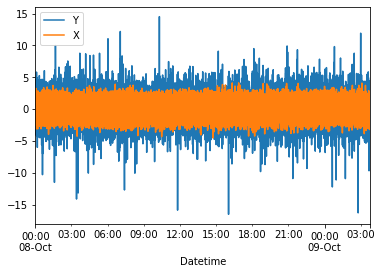

In [11]:
# adding datetime index
col = 0
time = pd.date_range('2021-10-08', periods=N, freq='s')
df.insert(col,"Datetime", time, True)
df.set_index('Datetime')
df.set_index('Datetime').plot()
plt.show()

In [12]:
# dataframe to csv
#df.to_csv('../Datasets/randomValues.csv')

## Series de tiempo

In [13]:
PATH = r'C:\Users\agust\Documents\GitHub\Carrera-de-Especializacion-en-IA\B5-Time_Series_Analysis\Datasets'

### Dataset 1: YPFD

In [14]:
dataset_1_name = r'\YPFD.2000.2021.csv'
YPFD = pd.read_csv(PATH+dataset_1_name)

In [15]:
YPFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4840 non-null   int64  
 1   fechaHora     4840 non-null   object 
 2   ultimoPrecio  4840 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 113.6+ KB


In [16]:
YPFD.head()

,Unnamed: 0,fechaHora,ultimoPrecio
0,0,2021-06-29 17:00:01.710,783.15
1,1,2021-06-28 17:00:03.613,807.00
2,2,2021-06-25 17:00:02.397,831.65
3,3,2021-06-24 17:00:03.497,871.40
4,4,2021-06-23 17:00:03.290,857.65


In [17]:
YPFD.drop(columns=['Unnamed: 0'], inplace = True)

In [18]:
YPFD.describe()

,ultimoPrecio
count,4840.000000
mean,115.680014
std,239.699517
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,950.050000


In [19]:
YPFD['fechaHora'] = pd.to_datetime(YPFD['fechaHora'], format="%Y-%m-%d %H:%M:%S")

In [20]:
YPFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fechaHora     4840 non-null   datetime64[ns]
 1   ultimoPrecio  4840 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.8 KB


<AxesSubplot:xlabel='fechaHora'>

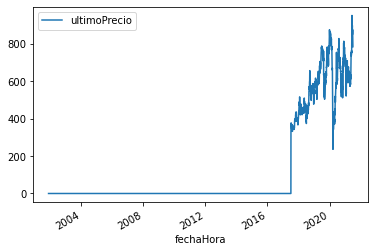

In [21]:
YPFD.plot(x='fechaHora',y='ultimoPrecio')

<AxesSubplot:ylabel='Frequency'>

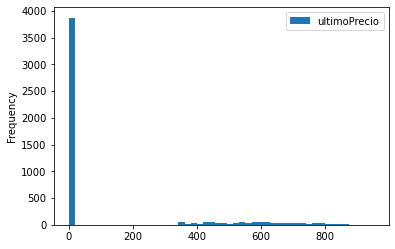

In [22]:
YPFD.plot(x='fechaHora',y='ultimoPrecio', kind='hist', bins = 50)

<AxesSubplot:>

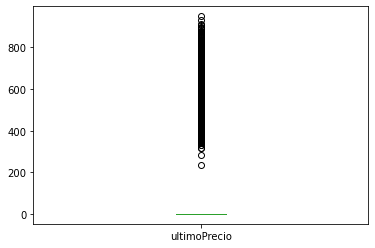

In [23]:
YPFD.plot(x='fechaHora',y='ultimoPrecio', kind='box')

<AxesSubplot:xlabel='fechaHora'>

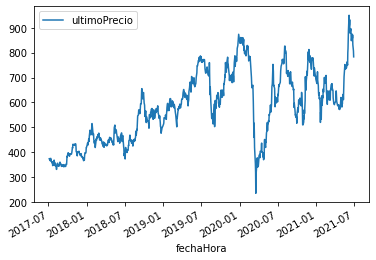

In [24]:
YPFD[YPFD.ultimoPrecio!=0].plot(x='fechaHora',y='ultimoPrecio')

<AxesSubplot:ylabel='Frequency'>

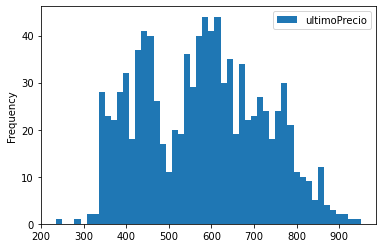

In [25]:
YPFD[YPFD.ultimoPrecio!=0].plot(x='fechaHora',y='ultimoPrecio', kind='hist', bins = 50)

<AxesSubplot:>

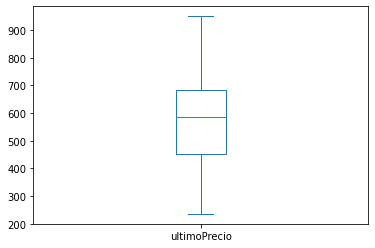

In [26]:
YPFD[YPFD.ultimoPrecio!=0].plot(x='fechaHora',y='ultimoPrecio', kind='box')

In [27]:
ypfd = YPFD.ultimoPrecio.to_numpy()
ypfd2 = YPFD[YPFD.ultimoPrecio!=0].ultimoPrecio.to_numpy()

In [28]:
print("Valor medio estimado")
print(mean_tsa(ypfd, 500))
print(mean_tsa(ypfd2, 100))
print("\nValor de autocorrelación estimado")
print(autocorrelacion_k_tsa(ypfd, 500, 10))
print(autocorrelacion_k_tsa(ypfd2, 100, 10))
print("\nValor de autocovarianza estimada")
print(autocovarianza_k_tsa(ypfd, 500, 10))
print(autocovarianza_k_tsa(ypfd2, 100, 10))

Valor medio estimado
[663.8782     454.55363496   0.           0.           0.
   0.           0.           0.           0.        ]
[679.2495     633.3575     598.105      679.145      638.637
 576.788      513.18969408 408.15319272 393.42696852]

Valor de autocorrelación estimado
[ 10177.12700584  52475.08343328 439455.522765   439455.522765
 439455.522765   439455.522765   439455.522765   439455.522765
 439455.522765  ]
[ 6359.21992197  8136.99660881 12048.50384475  6359.00960475
  7741.64972491 15487.01545716 30552.07737058 71197.35178696
 78465.51149792]

Valor de autocovarianza estimada
[0.70178523 0.89263419 0.96346999 0.96346999 0.96346999 0.96346999
 0.96346999 0.96346999 0.96346999]
[0.59657424 0.60869129 0.6590907  0.59647447 0.60273678 0.69000229
 0.75970743 0.81741444 0.82231697]


#### Analisis de la serie de tiempo YPFD

A partir de la gráfica de la serie de tiempo, de su distribución y de su boxplot, podemos decir que, a pesar de los datos faltantes, este esta serie de tiempo no es estacionaria, es creciente a lo largo del tiempo y no periódica.

### Dataset 2: S1MME_week45

In [29]:
dataset_2_name = r'\S1MME_week45.csv'
S1MME_w45 = pd.read_csv(PATH+dataset_2_name)

In [30]:
S1MME_w45.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   MyDay                                      1008 non-null   object
 1   NENAME                                     1008 non-null   object
 2   S1_mode_combined_attach_request_times_SEQ  1008 non-null   int64 
 3   S1_mode_combined_attach_success_times_SEQ  1008 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.6+ KB


In [31]:
S1MME_w45.head()

,MyDay,NENAME,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
0,2020/11/02 0:00,MME1BEL,367245,225822
1,2020/11/02 1:00,MME1BEL,295774,176136
2,2020/11/02 2:00,MME1BEL,305409,195410
3,2020/11/02 3:00,MME1BEL,277590,146942
4,2020/11/02 4:00,MME1BEL,303168,176509


In [32]:
S1MME_w45['MyDay'] = pd.to_datetime(S1MME_w45['MyDay'], format="%Y-%m-%d %H:%M:%S")

In [33]:
S1MME_w45.head()

,MyDay,NENAME,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
0,2020-11-02 00:00:00,MME1BEL,367245,225822
1,2020-11-02 01:00:00,MME1BEL,295774,176136
2,2020-11-02 02:00:00,MME1BEL,305409,195410
3,2020-11-02 03:00:00,MME1BEL,277590,146942
4,2020-11-02 04:00:00,MME1BEL,303168,176509


In [34]:
S1MME_w45['NENAME'].unique()

array(['MME1BEL', 'MME1CLI', 'MME1MUN', 'MME2BEL', 'MME2CLI', 'MME2MUN'],
      dtype=object)

In [35]:
S1MME_w45.describe()

,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
count,1008.000000,1008.000000
mean,382133.552579,231401.267857
std,90652.954849,67367.189127
min,51135.000000,31966.000000
25%,347147.750000,193757.250000
50%,397835.000000,238415.000000
75%,424354.500000,263678.000000
max,623494.000000,469172.000000


<AxesSubplot:xlabel='MyDay'>

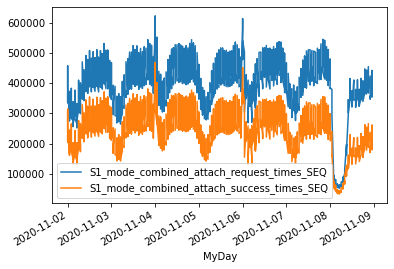

In [36]:
S1MME_w45.plot(x='MyDay',y=['S1_mode_combined_attach_request_times_SEQ', 'S1_mode_combined_attach_success_times_SEQ'])

<AxesSubplot:ylabel='Frequency'>

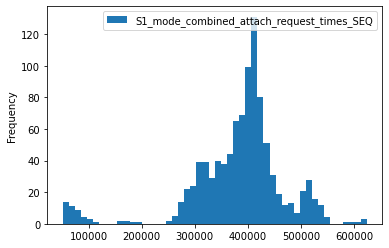

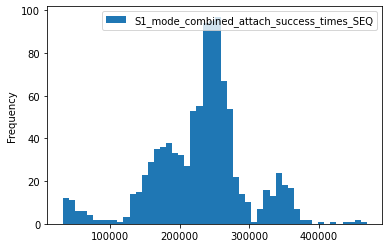

In [37]:
S1MME_w45.plot(x='MyDay',y='S1_mode_combined_attach_request_times_SEQ', kind='hist', bins = 50)
S1MME_w45.plot(x='MyDay',y='S1_mode_combined_attach_success_times_SEQ', kind='hist', bins = 50)

<AxesSubplot:>

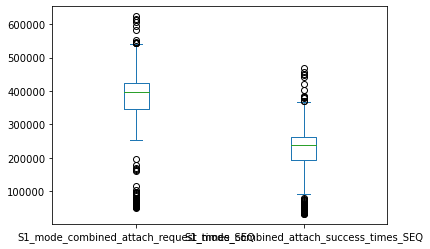

In [38]:
S1MME_w45.plot(x='MyDay',y=['S1_mode_combined_attach_request_times_SEQ', 'S1_mode_combined_attach_success_times_SEQ'], kind='box')

In [39]:
s1mme_request = S1MME_w45.S1_mode_combined_attach_request_times_SEQ.to_numpy()

In [58]:
print("Valor medio estimado")
print(mean_tsa(s1mme_request, 150))

print("\nValor de autocorrelación estimado")
print(autocorrelacion_k_tsa(s1mme_request, 150, 10))

print("\nValor de autocovarianza estimada")
print(autocovarianza_k_tsa(s1mme_request, 150, 10))

Valor medio estimado
[380034.33333333 448388.62666667 358768.09333333 362707.64666667
 363132.44       346793.75333333]

Valor de autocorrelación estimado
[-5.79233781e+08  2.81392276e+09  1.31221066e+08 -6.36438220e+07
 -8.29376830e+07  9.00100328e+08]

Valor de autocovarianza estimada
[-0.12402293  0.31387251  0.02510268 -0.01258682 -0.01645657  0.15162443]


In [41]:
s1mme_success = S1MME_w45.S1_mode_combined_attach_success_times_SEQ.to_numpy()

In [57]:
print("Valor medio estimado")
print(mean_tsa(s1mme_success, 150))

print("\nValor de autocorrelación estimado")
print(autocorrelacion_k_tsa(s1mme_success, 150, 10))

print("\nValor de autocovarianza estimada")
print(autocovarianza_k_tsa(s1mme_success, 150, 10))

Valor medio estimado
[229789.15333333 294566.01333333 215399.04       216061.32666667
 218894.96       205971.70666667]

Valor de autocorrelación estimado
[-1.22133608e+08  3.19470426e+09  1.96713038e+08  1.73613499e+08
  8.39604356e+07  6.13666784e+08]

Valor de autocovarianza estimada
[-0.04806547  0.49069386  0.07048705  0.06267089  0.03118592  0.19313206]


#### Analisis de la serie de tiempo S1MME_w45

A partir de la gráfica de la serie de tiempo, de su distribución y de su boxplot, podemos decir que este esta serie de tiempo que es el dataset que más se asemeja a ser estacionaria, se puede notar cierta periodicidad. 

### Dataset 3: TECO2.2010.2021

In [43]:
dataset_3_name = r'\TECO2.2010.2021.csv'
TECO2_10_21 = pd.read_csv(PATH+dataset_3_name)

In [44]:
TECO2_10_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2771 non-null   int64  
 1   fechaHora     2771 non-null   object 
 2   ultimoPrecio  2771 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 65.1+ KB


In [45]:
TECO2_10_21.describe()

,Unnamed: 0,ultimoPrecio
count,2771.000000,2771.000000
mean,1385.000000,71.413464
std,800.063123,62.781924
min,0.000000,8.551991
25%,692.500000,16.555273
50%,1385.000000,44.966572
75%,2077.500000,122.900000
max,2770.000000,269.950000


In [46]:
TECO2_10_21.drop(columns=['Unnamed: 0'], inplace = True)

In [47]:
TECO2_10_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fechaHora     2771 non-null   object 
 1   ultimoPrecio  2771 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.4+ KB


In [48]:
TECO2_10_21['fechaHora'] = pd.to_datetime(TECO2_10_21['fechaHora'], format="%Y-%m-%d %H:%M:%S")

In [49]:
TECO2_10_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fechaHora     2771 non-null   datetime64[ns]
 1   ultimoPrecio  2771 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.4 KB


In [50]:
TECO2_10_21.describe()

,ultimoPrecio
count,2771.000000
mean,71.413464
std,62.781924
min,8.551991
25%,16.555273
50%,44.966572
75%,122.900000
max,269.950000


<AxesSubplot:xlabel='fechaHora'>

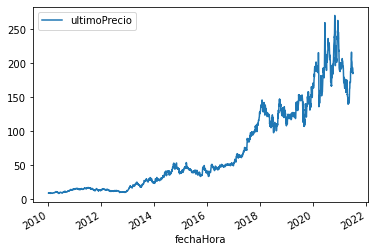

In [51]:
TECO2_10_21.plot(x='fechaHora',y='ultimoPrecio')

<AxesSubplot:ylabel='Frequency'>

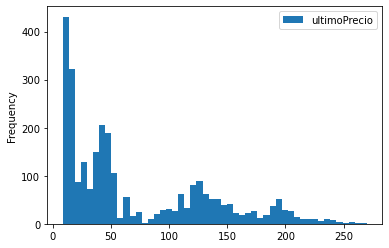

In [52]:
TECO2_10_21.plot(x='fechaHora',y='ultimoPrecio', kind = 'hist', bins = 50)

<AxesSubplot:>

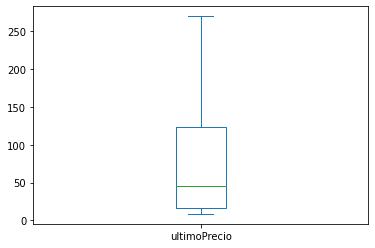

In [53]:
TECO2_10_21.plot(x='fechaHora',y='ultimoPrecio', kind = 'box')

In [54]:
teco = TECO2_10_21.ultimoPrecio.to_numpy()

In [55]:
print("Valor medio estimado")
print(mean_tsa(teco, 500))

print("\nValor de autocorrelación estimado")
print(autocorrelacion_k_tsa(teco, 500, 10))

print("\nValor de autocovarianza estimada")
print(autocovarianza_k_tsa(teco, 500, 10))

Valor medio estimado
[177.2686     114.97952     47.70743629  34.31249265  14.11908637]

Valor de autocorrelación estimado
[  790.16111555  4647.74493309 17338.02862044 20921.62490265
 26987.37915851]

Valor de autocovarianza estimada
[0.76164478 0.93822235 0.96958906 0.97154514 0.97365308]


#### Analisis de la serie de tiempo TECO2_10_21

A partir de la gráfica de la serie de tiempo, de su distribución y de su boxplot, podemos decir que este esta serie de tiempo no es estacionaria, es creciente a lo largo del tiempo y no periódica.